# Pneumonia Identification Project

# Business and Data Understanding


# Data preparation

In [1]:
from tensorflow import keras
from keras_preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np

In [2]:
# Linking directory path
train_data_dir = 'data/chest_xray/train'
val_data_dir = 'data/chest_xray/val'
test_data_dir = 'data/chest_xray/test'

In [3]:
# Getting train, test, and validation data from directory
train_generator = ImageDataGenerator().flow_from_directory(train_data_dir,
                                                           target_size=(64, 64),
                                                           batch_size=5000,
                                                           seed=42)

test_generator = ImageDataGenerator().flow_from_directory(test_data_dir,
                                                          target_size=(64, 64),
                                                          batch_size=624,
                                                          seed=42)

val_generator = ImageDataGenerator().flow_from_directory(val_data_dir,
                                                         target_size=(64, 64),
                                                         batch_size=232,
                                                         seed=42)

Found 5000 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 232 images belonging to 2 classes.


In [4]:
# Creating datasets, takes about a minute to run.
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [5]:
# Reshaping data
train_img_unrow = train_images.reshape(5000, -1)
test_img_unrow = test_images.reshape(624, -1)
val_img_unrow = val_images.reshape(232, -1)

In [6]:
print(np.shape(train_img_unrow))
print(np.shape(test_img_unrow))
print(np.shape(val_img_unrow))

(5000, 12288)
(624, 12288)
(232, 12288)


In [7]:
# Normalizing data
train_img_final = train_img_unrow/255.0
test_img_final = test_img_unrow/255.0
val_img_final = val_img_unrow/255.0

# Modeling

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [9]:
# Function to quickly plot model results
def plot_results(model_results):
    """
    This function will take in the results of a model and plot the loss and accuracy of the model.

    Args:
    model_results (list): the results of the model in [] brackets.
    """
    for results in model_results:
        train_loss = results.history['loss']
        train_acc = results.history['accuracy']
        val_loss = results.history['val_loss']
        val_acc = results.history['val_accuracy']

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        sns.lineplot(x=results.epoch, y=train_loss, ax=ax1, label='train_loss')
        sns.lineplot(x=results.epoch, y=train_acc, ax=ax2, label='train_accuracy')

        sns.lineplot(x=results.epoch, y=val_loss, ax=ax1, label='val_loss')
        sns.lineplot(x=results.epoch, y=val_acc, ax=ax2, label='val_accuracy')
        ax1.set_title('Loss')
        ax2.set_title('Accuracy')
        ax1.legend();

In [10]:
# Function to quickly print out model evaluation for mulitple data sets
def model_evaluation(model, data_dict):
    """
    This function takes in a sequential model as a well as a dictionary of data and 
    prints out the model evaluation results.
    
    Arguments:
    model: A trained model with .evaluate() capabilities
    data_dict: A dictionary where Keys are dataset names and Values are tuples (X, y) for data and labels. 
    """
    for name, (X, y) in data_dict.items():
        loss, acc = model.evaluate(X, y)
        
        print(f'{name}, Loss: {loss:.4f}, Accuracy: {acc:.4f}')

In [11]:
# Creating dictionary for train, test, validation data
data_dict = {
    'Train Data': (train_images, train_labels),
    'Test Data': (test_images, test_labels),
    'Val Data': (val_images, val_labels)
}

In [12]:
# Creating dictionary for normalized train, test, validation data
data_dict_norm = {
    'Train Data': (train_img_final, train_labels),
    'Test Data': (test_img_final, test_labels),
    'Val Data': (val_img_final, val_labels)
}

## Model 1

In [13]:
# Model 1 base model
model_1 = Sequential()

In [14]:
model_1.add(layers.Input(shape=(12288,)))
model_1.add(Dense(50, activation='relu'))
model_1.add(Dense(25, activation='relu'))
model_1.add(Dense(10, activation='relu'))
model_1.add(Dense(2, activation='softmax'))

In [15]:
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
model_1_results = model_1.fit(train_img_final, train_labels,
                              epochs=10,
                              batch_size=125, 
                              validation_data=(val_img_final, val_labels))

Epoch 1/10
40/40 [==============================] - 0s 5ms/step - loss: 0.6953 - accuracy: 0.7366 - val_loss: 0.6225 - val_accuracy: 0.6164
Epoch 2/10
40/40 [==============================] - 0s 3ms/step - loss: 0.2745 - accuracy: 0.8920 - val_loss: 0.3794 - val_accuracy: 0.8405
Epoch 3/10
40/40 [==============================] - 0s 3ms/step - loss: 0.1802 - accuracy: 0.9382 - val_loss: 0.3801 - val_accuracy: 0.8147
Epoch 4/10
40/40 [==============================] - 0s 3ms/step - loss: 0.1439 - accuracy: 0.9500 - val_loss: 0.2483 - val_accuracy: 0.8879
Epoch 5/10
40/40 [==============================] - 0s 3ms/step - loss: 0.1475 - accuracy: 0.9432 - val_loss: 0.2624 - val_accuracy: 0.8793
Epoch 6/10
40/40 [==============================] - 0s 3ms/step - loss: 0.1180 - accuracy: 0.9576 - val_loss: 0.3045 - val_accuracy: 0.8707
Epoch 7/10
40/40 [==============================] - 0s 4ms/step - loss: 0.1100 - accuracy: 0.9606 - val_loss: 0.2388 - val_accuracy: 0.8836
Epoch 8/10
40/40 [==

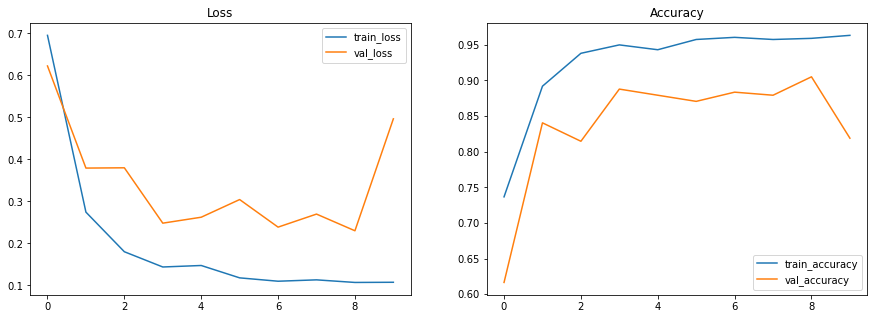

In [17]:
plot_results([model_1_results])

In [18]:
model_evaluation(model_1, data_dict_norm)

157/157 [==============================] - 0s 592us/step - loss: 0.1392 - accuracy: 0.9432
Train Data, Loss: 0.1392, Accuracy: 0.9432
20/20 [==============================] - 0s 556us/step - loss: 1.2666 - accuracy: 0.6955
Test Data, Loss: 1.2666, Accuracy: 0.6955
8/8 [==============================] - 0s 918us/step - loss: 0.4966 - accuracy: 0.8190
Val Data, Loss: 0.4966, Accuracy: 0.8190


## Model 2

In [19]:
# Model 2
model_2 = Sequential()

In [20]:
model_2.add(layers.Input(shape=(12288,)))
model_2.add(Dense(50, activation='relu'))
model_2.add(Dense(25, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(10, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(2, activation='softmax'))

In [21]:
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
model_2_results = model_2.fit(train_img_final, train_labels,
                              epochs=50,
                              batch_size=300, 
                              validation_data=(val_img_final, val_labels))

Epoch 1/50
17/17 [==============================] - 0s 8ms/step - loss: 0.8928 - accuracy: 0.6204 - val_loss: 0.7110 - val_accuracy: 0.5000
Epoch 2/50
17/17 [==============================] - 0s 5ms/step - loss: 0.6745 - accuracy: 0.6858 - val_loss: 0.7105 - val_accuracy: 0.5000
Epoch 3/50
17/17 [==============================] - 0s 6ms/step - loss: 0.5715 - accuracy: 0.7262 - val_loss: 0.6732 - val_accuracy: 0.5000
Epoch 4/50
17/17 [==============================] - 0s 6ms/step - loss: 0.5087 - accuracy: 0.7532 - val_loss: 0.6571 - val_accuracy: 0.5000
Epoch 5/50
17/17 [==============================] - 0s 5ms/step - loss: 0.4474 - accuracy: 0.7778 - val_loss: 0.5930 - val_accuracy: 0.5000
Epoch 6/50
17/17 [==============================] - 0s 5ms/step - loss: 0.4049 - accuracy: 0.7952 - val_loss: 0.5616 - val_accuracy: 0.6034
Epoch 7/50
17/17 [==============================] - 0s 7ms/step - loss: 0.3567 - accuracy: 0.8214 - val_loss: 0.5308 - val_accuracy: 0.7543
Epoch 8/50
17/17 [==

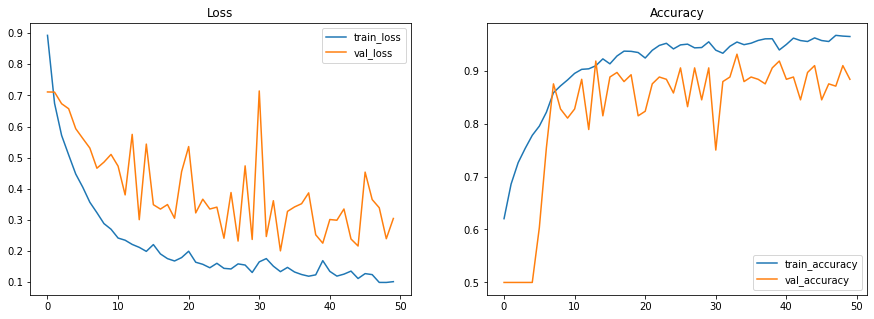

In [23]:
plot_results([model_2_results])

In [24]:
model_evaluation(model_2, data_dict_norm)

157/157 [==============================] - 0s 593us/step - loss: 0.0777 - accuracy: 0.9704
Train Data, Loss: 0.0777, Accuracy: 0.9704
20/20 [==============================] - 0s 605us/step - loss: 1.3993 - accuracy: 0.7324
Test Data, Loss: 1.3993, Accuracy: 0.7324
8/8 [==============================] - 0s 633us/step - loss: 0.3047 - accuracy: 0.8836
Val Data, Loss: 0.3047, Accuracy: 0.8836


## Model 3

In [25]:
# Creating an earlystop variable
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [26]:
model_3 = Sequential()

In [27]:
model_3.add(layers.Input(shape=(12288,)))
model_3.add(Dense(50, activation='relu'))
model_3.add(Dense(50, activation='relu', kernel_regularizer=l2(l2=0.5)))
model_3.add(Dropout(0.5))
model_3.add(Dense(25, activation='relu'))
model_3.add(Dense(25, activation='relu', kernel_regularizer=l2(l2=0.25)))
model_3.add(Dropout(0.2))
model_3.add(Dense(10, activation='relu'))
model_3.add(Dense(2, activation='softmax'))

In [28]:
model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
model_3_results = model_3.fit(train_img_final, train_labels,
                              epochs=40, 
                              batch_size=350,
                              validation_data=(val_img_final, val_labels),
                              callbacks=[early_stop])

Epoch 1/40
15/15 [==============================] - 0s 10ms/step - loss: 30.0072 - accuracy: 0.6298 - val_loss: 27.2234 - val_accuracy: 0.5000
Epoch 2/40
15/15 [==============================] - 0s 6ms/step - loss: 25.1234 - accuracy: 0.7178 - val_loss: 22.8862 - val_accuracy: 0.5000
Epoch 3/40
15/15 [==============================] - 0s 6ms/step - loss: 21.0125 - accuracy: 0.7512 - val_loss: 19.1307 - val_accuracy: 0.5000
Epoch 4/40
15/15 [==============================] - 0s 6ms/step - loss: 17.5050 - accuracy: 0.7830 - val_loss: 15.8948 - val_accuracy: 0.7974
Epoch 5/40
15/15 [==============================] - 0s 6ms/step - loss: 14.5450 - accuracy: 0.8298 - val_loss: 13.2835 - val_accuracy: 0.7629
Epoch 6/40
15/15 [==============================] - 0s 6ms/step - loss: 12.0537 - accuracy: 0.8780 - val_loss: 10.9147 - val_accuracy: 0.8836
Epoch 7/40
15/15 [==============================] - 0s 6ms/step - loss: 9.9590 - accuracy: 0.9088 - val_loss: 9.2949 - val_accuracy: 0.7457
Epoch 8

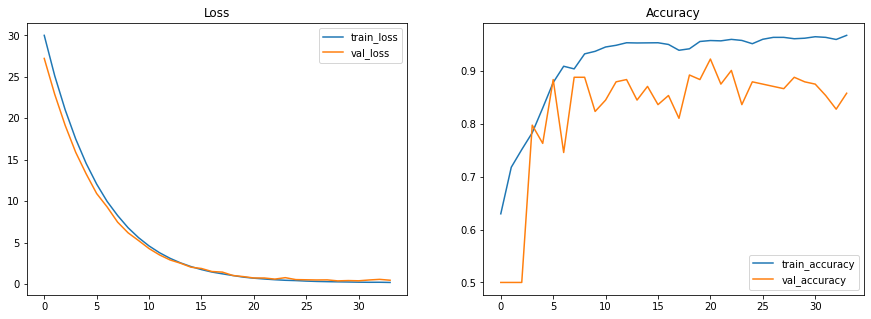

In [30]:
plot_results([model_3_results])

In [31]:
model_evaluation(model_3, data_dict_norm)

157/157 [==============================] - 0s 770us/step - loss: 0.2160 - accuracy: 0.9668
Train Data, Loss: 0.2160, Accuracy: 0.9668
20/20 [==============================] - 0s 605us/step - loss: 0.7833 - accuracy: 0.7788
Test Data, Loss: 0.7833, Accuracy: 0.7788
8/8 [==============================] - 0s 649us/step - loss: 0.3697 - accuracy: 0.8879
Val Data, Loss: 0.3697, Accuracy: 0.8879


## Model 4

In [32]:
model_4 = Sequential()

In [33]:
model_4.add(layers.Input(shape=(12288,)))
model_4.add(Dense(75, activation='relu'))
model_4.add(Dense(50, activation='relu'))
model_4.add(Dropout(0.5))
model_4.add(Dense(50, activation='relu', kernel_regularizer=l2(l2=0.5)))
model_4.add(Dense(25, activation='relu'))
model_4.add(Dropout(0.25))
model_4.add(Dense(25, activation='relu', kernel_regularizer=l2(l2=0.25)))
model_4.add(Dense(10, activation='relu', kernel_regularizer=l2(l2=0.01)))
model_4.add(Dense(2, activation='softmax'))

In [34]:
model_4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
model_4_results = model_4.fit(train_img_final, train_labels,
                              epochs=50,
                              batch_size=250,
                              validation_data=(val_img_final, val_labels),
                              callbacks=[early_stop])

Epoch 1/50
20/20 [==============================] - 0s 9ms/step - loss: 28.6352 - accuracy: 0.4258 - val_loss: 25.2154 - val_accuracy: 0.5000
Epoch 2/50
20/20 [==============================] - 0s 5ms/step - loss: 22.4813 - accuracy: 0.7234 - val_loss: 19.9577 - val_accuracy: 0.5000
Epoch 3/50
20/20 [==============================] - 0s 6ms/step - loss: 17.6345 - accuracy: 0.7630 - val_loss: 15.6493 - val_accuracy: 0.5000
Epoch 4/50
20/20 [==============================] - 0s 6ms/step - loss: 13.7737 - accuracy: 0.8082 - val_loss: 12.2996 - val_accuracy: 0.6293
Epoch 5/50
20/20 [==============================] - 0s 6ms/step - loss: 10.7083 - accuracy: 0.8596 - val_loss: 9.5372 - val_accuracy: 0.7931
Epoch 6/50
20/20 [==============================] - 0s 6ms/step - loss: 8.3152 - accuracy: 0.8950 - val_loss: 7.4235 - val_accuracy: 0.8448
Epoch 7/50
20/20 [==============================] - 0s 5ms/step - loss: 6.4416 - accuracy: 0.9142 - val_loss: 6.0524 - val_accuracy: 0.7371
Epoch 8/50


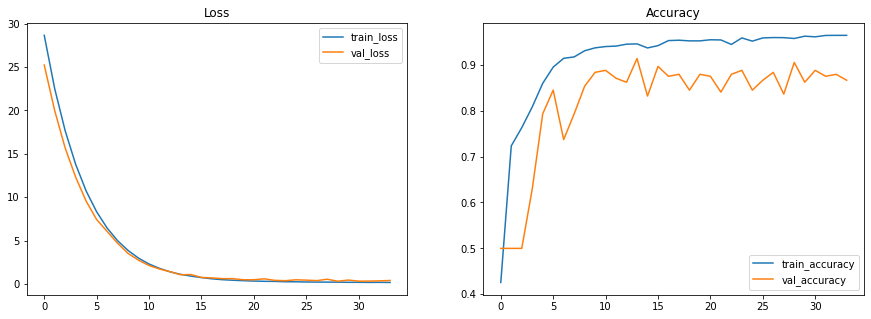

In [36]:
plot_results([model_4_results])

In [37]:
model_evaluation(model_4, data_dict_norm)

157/157 [==============================] - 0s 625us/step - loss: 0.1928 - accuracy: 0.9594
Train Data, Loss: 0.1928, Accuracy: 0.9594
20/20 [==============================] - 0s 924us/step - loss: 0.6898 - accuracy: 0.7949
Test Data, Loss: 0.6898, Accuracy: 0.7949
8/8 [==============================] - 0s 750us/step - loss: 0.3164 - accuracy: 0.9052
Val Data, Loss: 0.3164, Accuracy: 0.9052


## Model 5

In [38]:
# reduce learning rate for val_accuracy
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.3, patience=2, min_lr=1e-5)

In [39]:
model_5 = models.Sequential()

In [40]:
model_5.add(layers.Conv2D(16, (5, 5), activation='relu', input_shape=(64, 64, 3)))
model_5.add(layers.BatchNormalization())
model_5.add(layers.MaxPooling2D())

model_5.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model_5.add(layers.BatchNormalization())

model_5.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2=0.00001)))
model_5.add(layers.BatchNormalization())
model_5.add(layers.Dropout(0.5))
model_5.add(layers.MaxPooling2D())

model_5.add(layers.Conv2D(64, (3, 3), activation='relu', padding='valid'))

model_5.add(layers.Conv2D(64, (3, 3), activation='relu', padding='valid'))
model_5.add(layers.MaxPooling2D())

model_5.add(layers.Conv2D(128, (3, 3), activation='relu', padding='valid', kernel_regularizer=l2(l2=0.00001)))
model_5.add(layers.Dropout(0.1))
model_5.add(layers.MaxPooling2D())

model_5.add(layers.Flatten())
model_5.add(layers.Dense(2, activation='softmax'))

In [41]:
model_5.compile(Adam(learning_rate=0.0002), loss='binary_crossentropy', metrics=['accuracy'])

In [42]:
model_5_results = model_5.fit(train_images, train_labels,
                              epochs=20,
                              batch_size=330,
                              validation_data=(val_images, val_labels),
                              callbacks=[early_stop, reduce_lr])

Epoch 1/20
16/16 [==============================] - 6s 357ms/step - loss: 0.5033 - accuracy: 0.7910 - val_loss: 1.1135 - val_accuracy: 0.5000
Epoch 2/20
16/16 [==============================] - 6s 354ms/step - loss: 0.2477 - accuracy: 0.8984 - val_loss: 1.1181 - val_accuracy: 0.5000
Epoch 3/20
16/16 [==============================] - 6s 353ms/step - loss: 0.1887 - accuracy: 0.9258 - val_loss: 0.6128 - val_accuracy: 0.5905
Epoch 4/20
16/16 [==============================] - 6s 350ms/step - loss: 0.1638 - accuracy: 0.9392 - val_loss: 0.3527 - val_accuracy: 0.8879
Epoch 5/20
16/16 [==============================] - 6s 350ms/step - loss: 0.1421 - accuracy: 0.9460 - val_loss: 0.4368 - val_accuracy: 0.7802
Epoch 6/20
16/16 [==============================] - 6s 351ms/step - loss: 0.1283 - accuracy: 0.9512 - val_loss: 0.3256 - val_accuracy: 0.8750
Epoch 7/20
16/16 [==============================] - 6s 351ms/step - loss: 0.1110 - accuracy: 0.9604 - val_loss: 0.2878 - val_accuracy: 0.9052
Epoch 

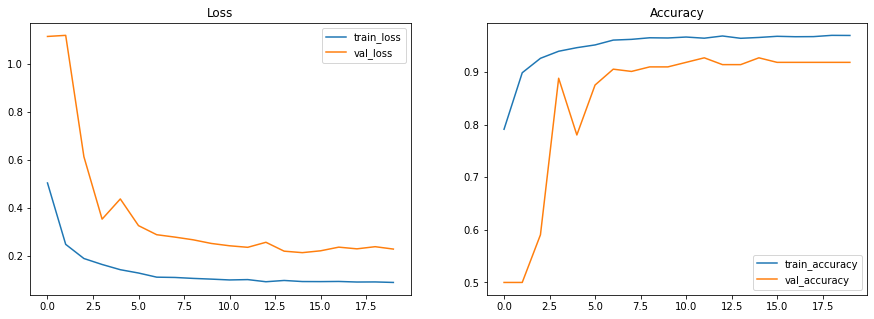

In [43]:
plot_results([model_5_results])

In [44]:
model_evaluation(model_5, data_dict)

157/157 [==============================] - 1s 8ms/step - loss: 0.1540 - accuracy: 0.9540
Train Data, Loss: 0.1540, Accuracy: 0.9540
20/20 [==============================] - 0s 8ms/step - loss: 0.3161 - accuracy: 0.8622
Test Data, Loss: 0.3161, Accuracy: 0.8622
8/8 [==============================] - 0s 7ms/step - loss: 0.2131 - accuracy: 0.9267
Val Data, Loss: 0.2131, Accuracy: 0.9267


# Evaluation

In [45]:
model_5.evaluate(test_images, test_labels)

20/20 [==============================] - 0s 8ms/step - loss: 0.3161 - accuracy: 0.8622


[0.3160666823387146, 0.8621794581413269]

In [46]:
test_img_pred = model_5.predict(test_images)

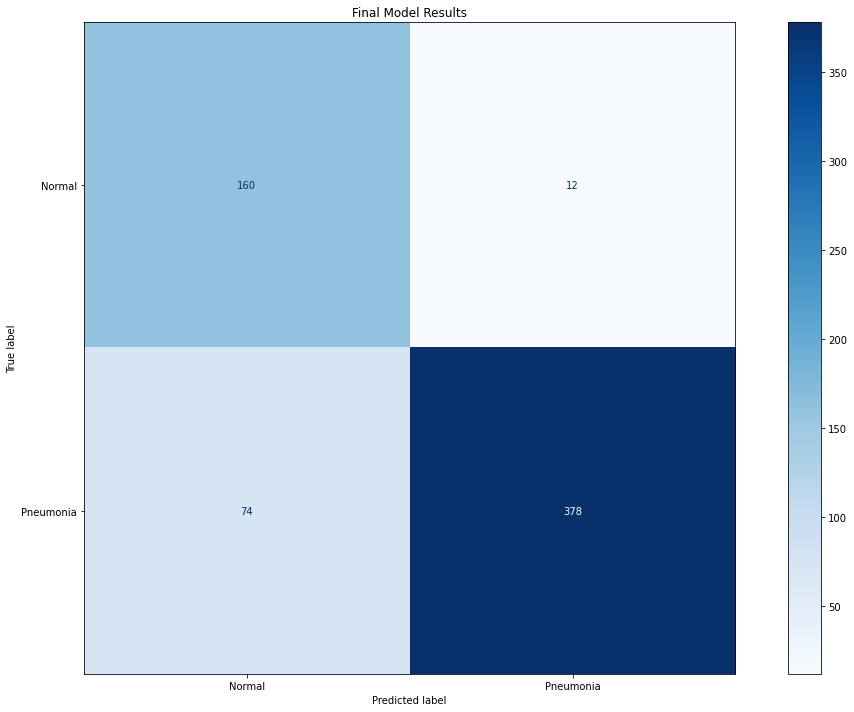

In [47]:
# Confusion Matrix of final Model
fig, ax = plt.subplots(figsize=(15, 10))

ax.set_title('Final Model Results')

test_img_pred_labels = np.argmax(test_img_pred, axis=1)
test_true_labels = np.argmax(test_labels, axis=1)

cm = confusion_matrix(test_img_pred_labels, test_true_labels)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Pneumonia']).plot(ax=ax, cmap='Blues')

plt.tight_layout();

# Limitations

# Next Steps